In [1]:
#importing the liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
data=pd.read_csv('tae.csv')

In [3]:
#displaying the data
data

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


# BASIC CHECKS

In [4]:
#it will show the no of rows and no of columns
data.shape

(150, 6)

In [5]:
#it will show first 5 rows
data.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [6]:
#it will show last 5 rows
data.tail()

,1,23,3,1.1,19,3.1
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [7]:
#it display the datatypes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       150 non-null    int64
 1   23      150 non-null    int64
 2   3       150 non-null    int64
 3   1.1     150 non-null    int64
 4   19      150 non-null    int64
 5   3.1     150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
#it shows the statistical inforamation of data
data.describe()

,1,23,3,1.1,19,3.1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


# EDA

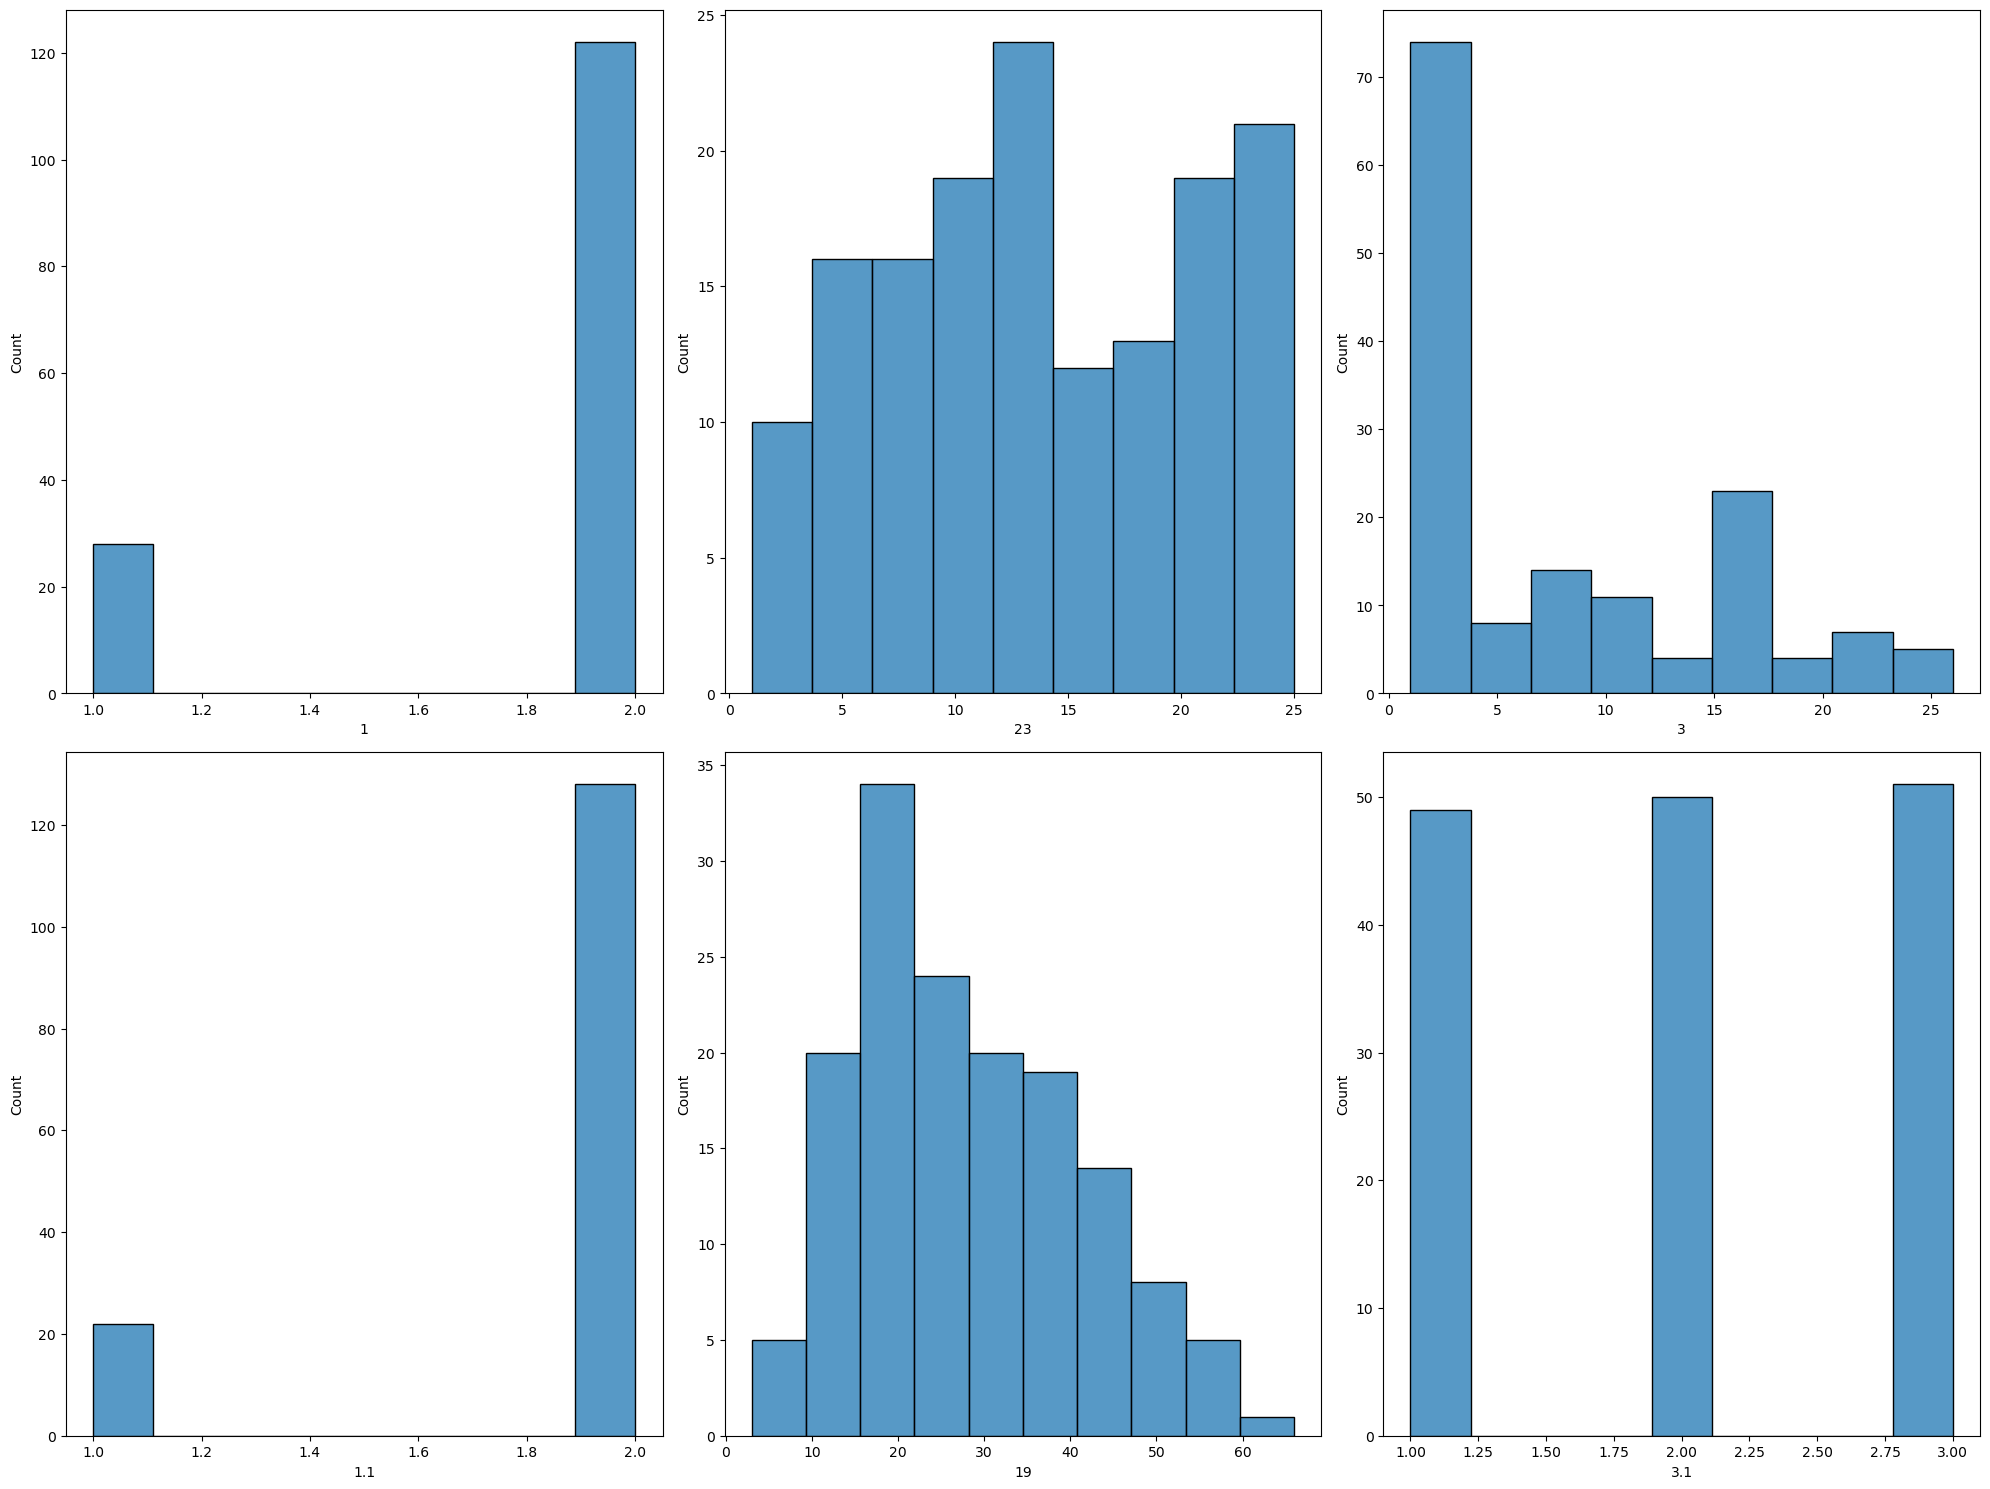

In [9]:
#UNIVARIATE ANALYSIS
plt.figure(figsize=(20,22))
n=1
for i in data:
    plt.subplot(3,3,n)
    sns.histplot(x=data[i])
    n+=1
plt.tight_layout()

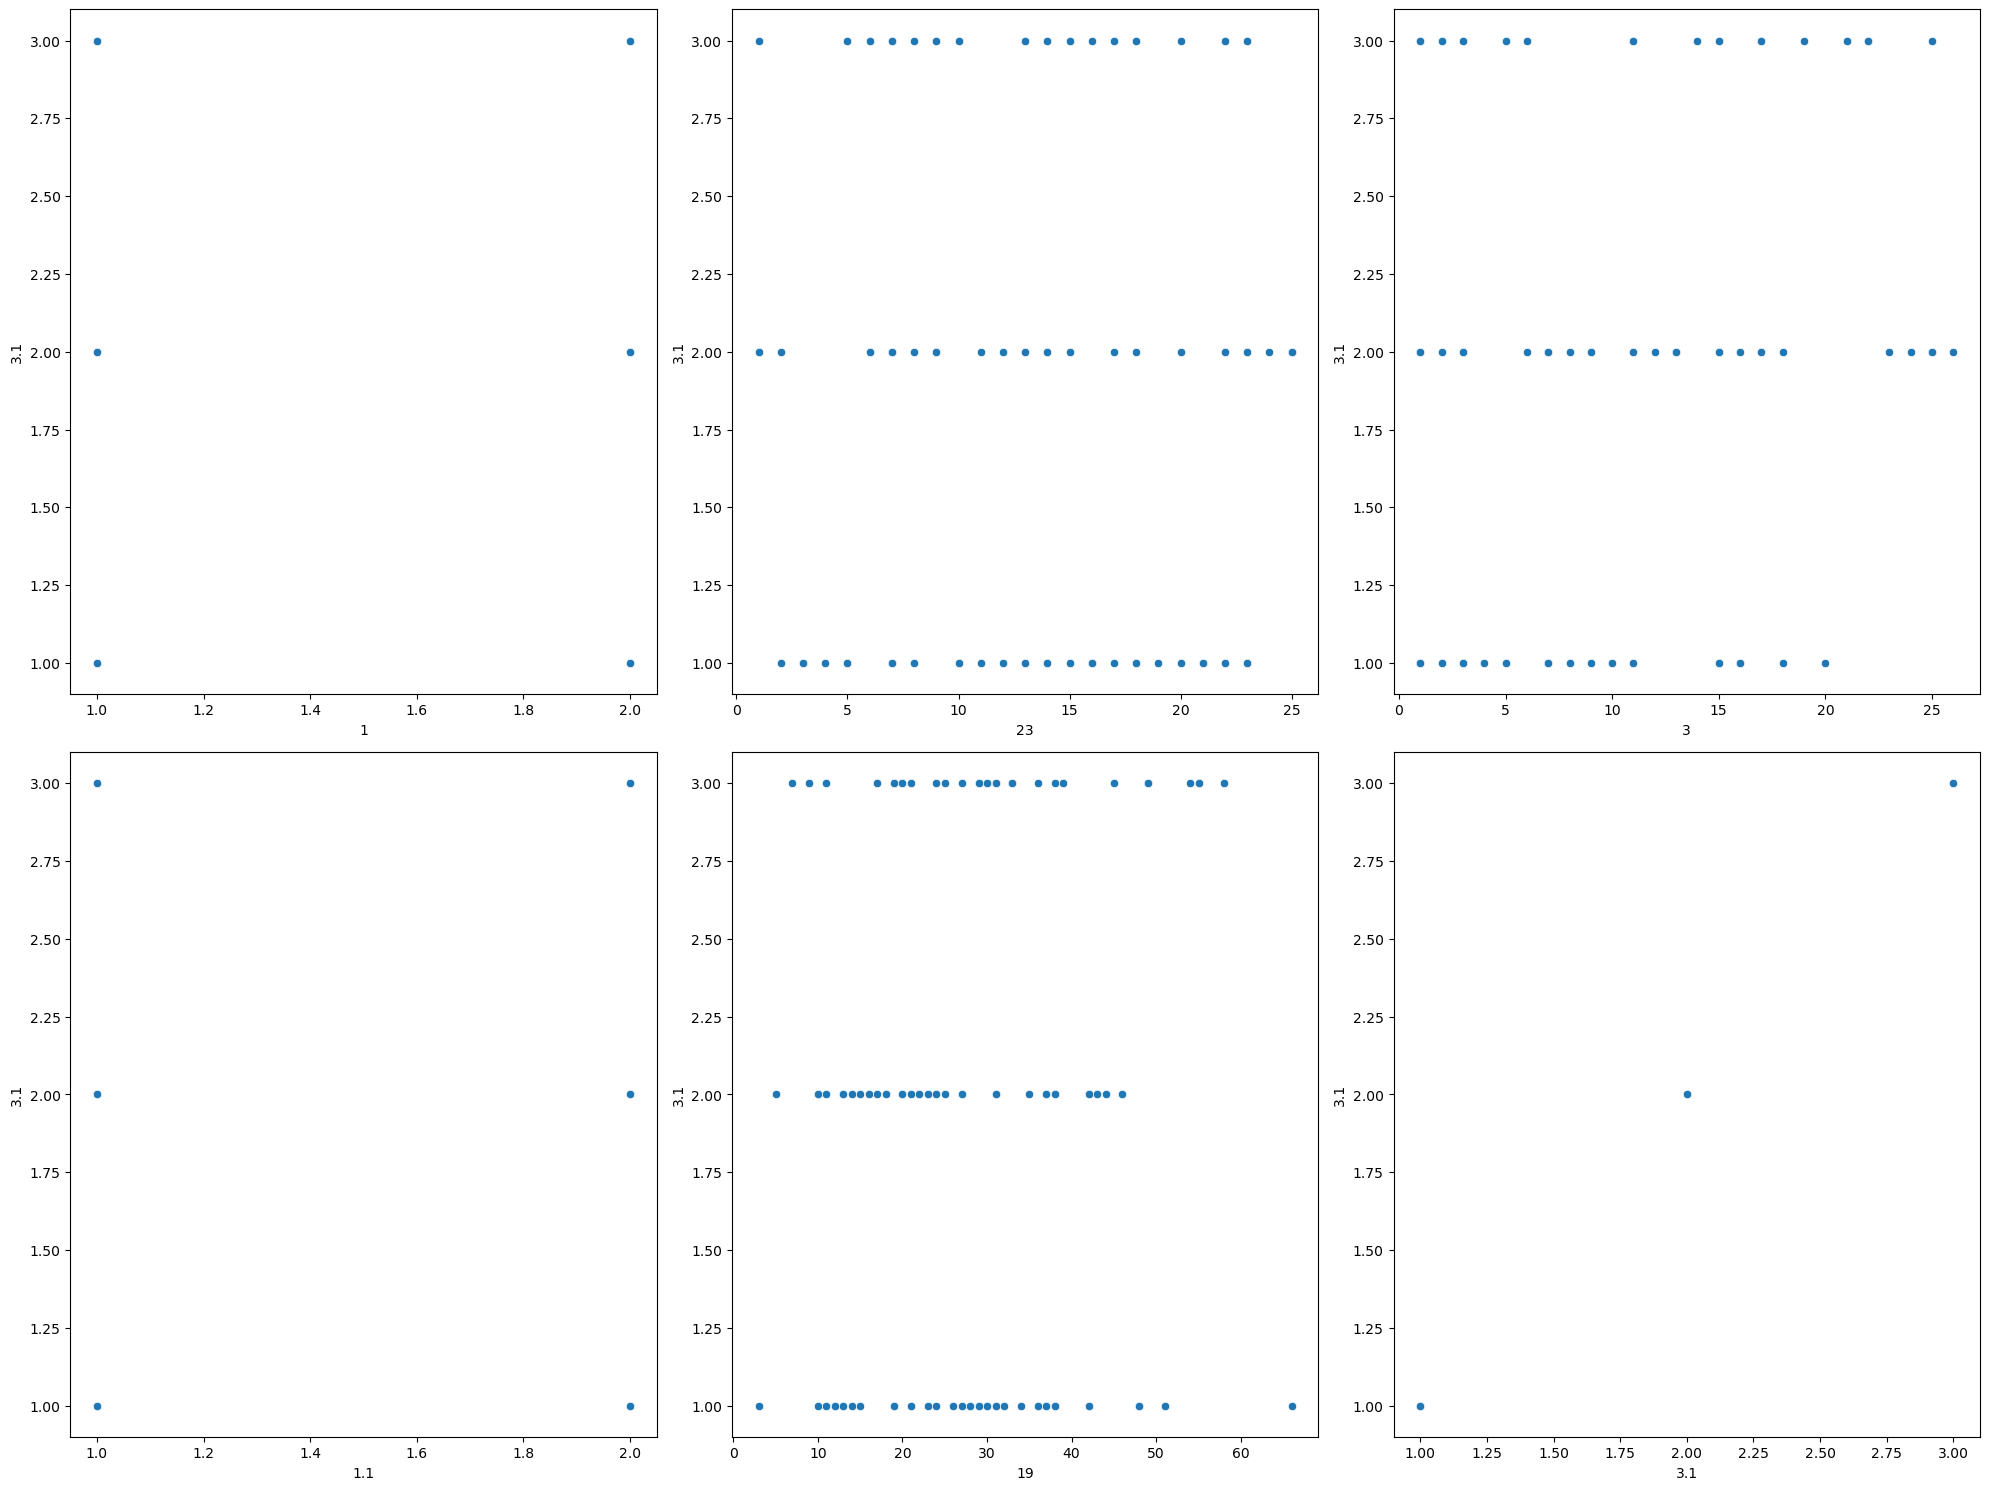

In [10]:
#BIVARIATE ANALYSIS
plt.figure(figsize=(20,22))
n=1
for i in data:
    plt.subplot(3,3,n)
    sns.scatterplot(x=data[i],y=data['3.1'])
    n+=1
plt.tight_layout()

# DATA PREPROCESSING

In [11]:
#finding missing value
data.isnull().sum()

1      0
23     0
3      0
1.1    0
19     0
3.1    0
dtype: int64

# converting categorical to numerical

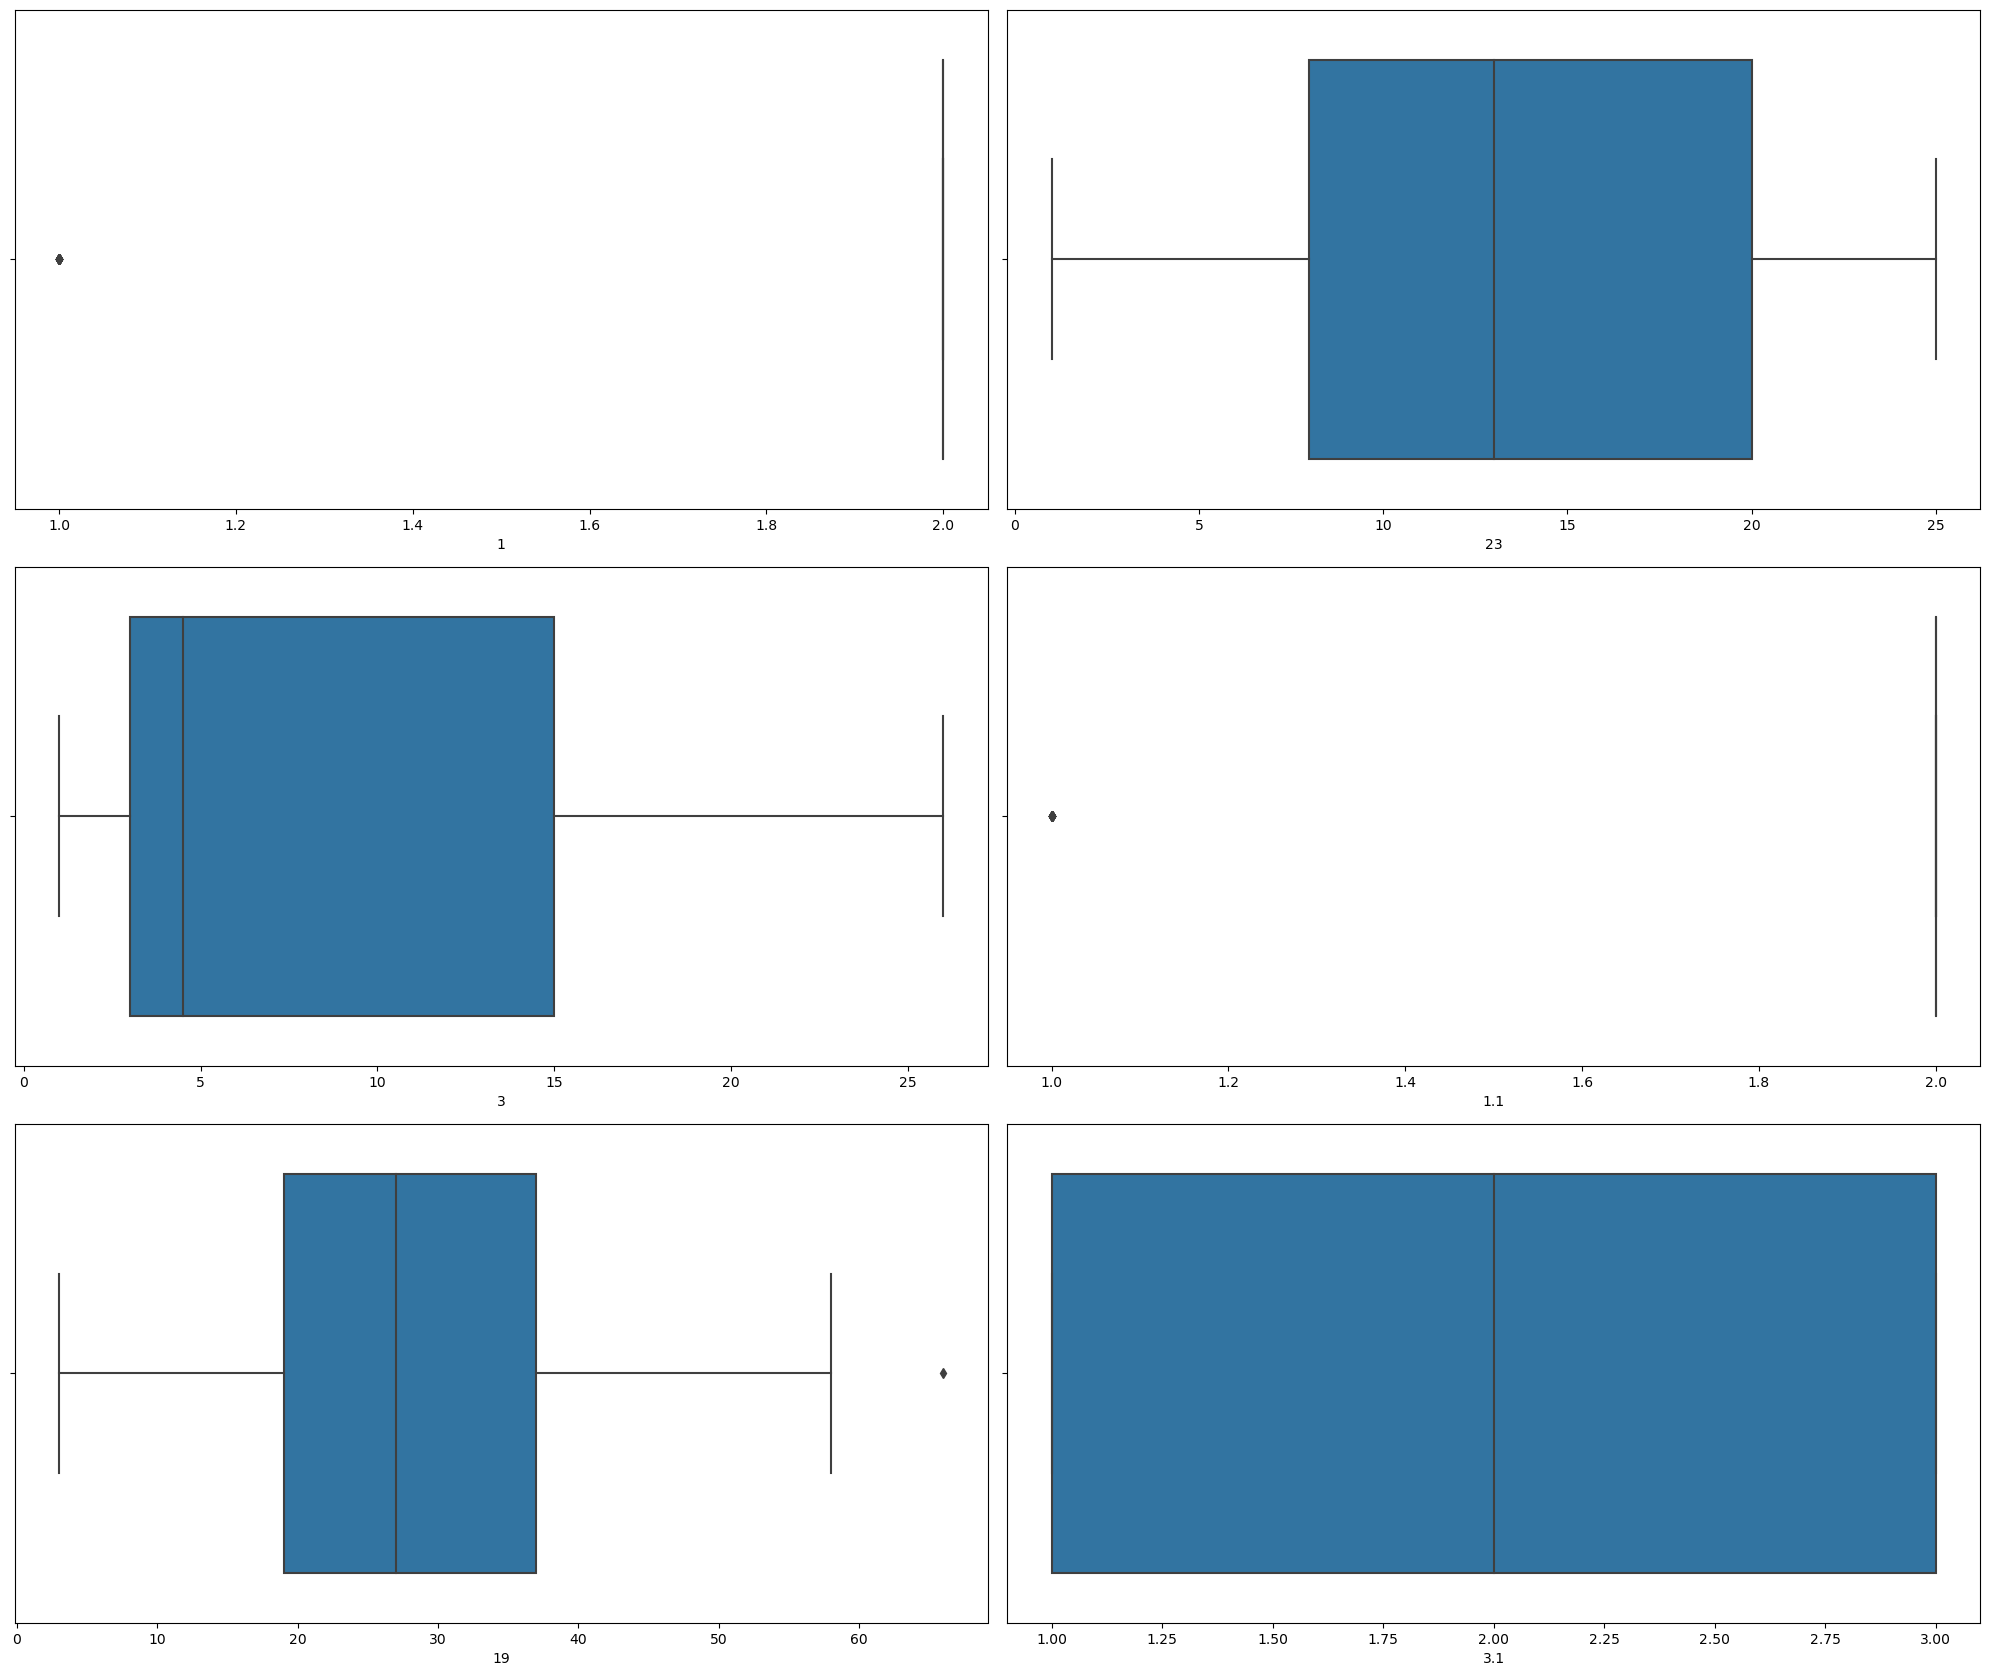

In [12]:
#checking outliers
plt.figure(figsize=(20,22))
n=1
for i in data:
    plt.subplot(4,2,n)
    sns.boxplot(x=data[i])
    n+=1
plt.tight_layout()

In [13]:
data.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [14]:
data["1"].unique()

array([2, 1], dtype=int64)

In [15]:
data["1"].value_counts()

1
2    122
1     28
Name: count, dtype: int64

In [16]:
data["19"].unique()

array([17, 49, 33, 55, 20, 19, 27, 58,  9, 30, 29, 39, 42, 43, 10, 46, 23,
       31, 22, 37, 13, 24, 38, 28, 51, 36, 21, 48, 25, 11, 45, 18, 14, 35,
       15, 32, 34, 66, 12,  3,  7, 54, 16, 44,  5, 26], dtype=int64)

In [17]:
data.loc[data['19']>60,'19']=np.median(data['19'])

<Axes: xlabel='19'>

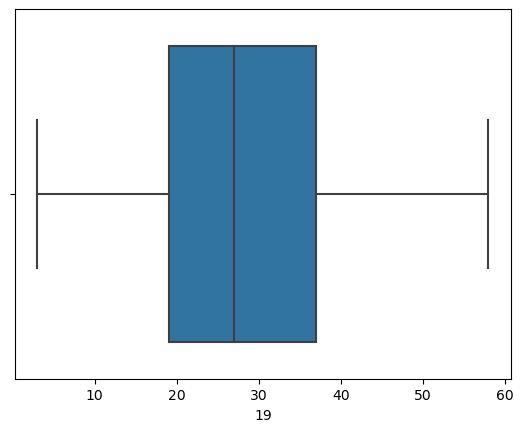

In [18]:
#After handling and removing the outliers of numerical data
sns.boxplot(x=data['19'])

# FEATURE SELECTION

In [19]:
# first five columns
data.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [20]:
#checking for correalation 
corr_matrix=data.corr()

<Axes: >

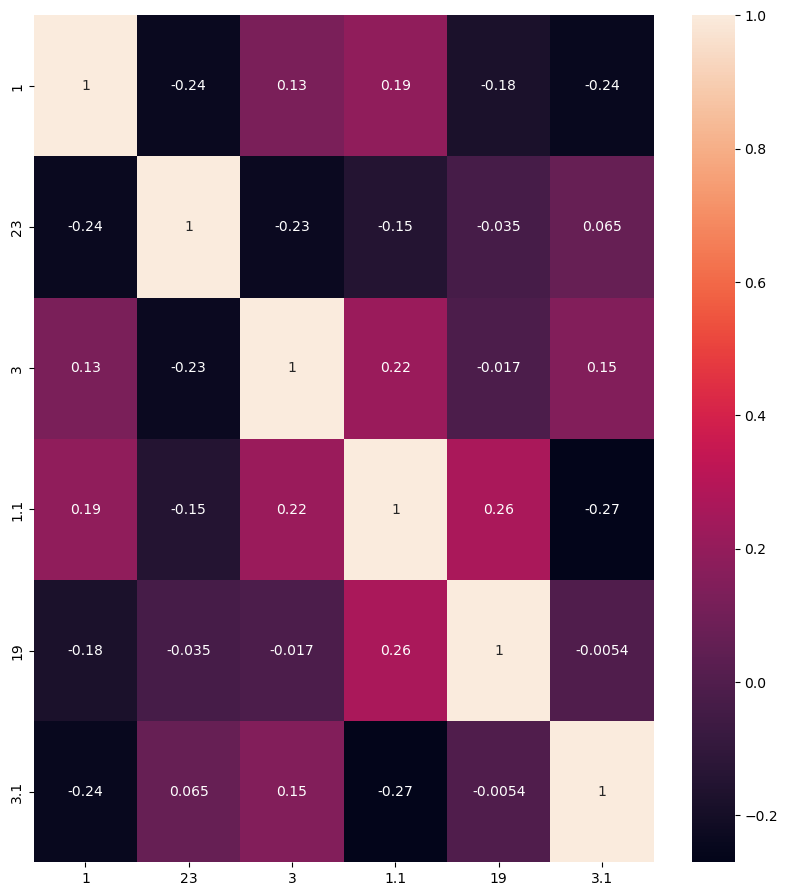

In [21]:
#The plot is used to see the correlation matrix of the data set
plt.figure(figsize=(10,11))
sns.heatmap(corr_matrix,annot=True)

In [22]:
data["3.1"].value_counts()

3.1
3    51
2    50
1    49
Name: count, dtype: int64

# MODEL CREATION

In [23]:
#creating independent and dependend 
x=data.drop('3.1',axis=1)
y=data['3.1']

In [24]:
#training and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(120, 5)

In [26]:
x_test.shape

(30, 5)

# LogisticRegression

In [27]:
#creating model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [28]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

# MODEL EVALUATION

In [29]:
from sklearn.metrics import classification_report ,confusion_matrix,recall_score,precision_score,accuracy_score,accuracy_score,f1_score

In [30]:
confusion_matrix(y_test,y_pred)

array([[10,  3,  1],
       [ 4,  5,  2],
       [ 1,  3,  1]], dtype=int64)

In [31]:
accuracy_score_lr=accuracy_score(y_test,y_pred)

In [32]:
recall_score_lr=recall_score(y_test,y_pred,average="macro")

In [33]:
precision_score(y_test,y_pred,
average='macro')

0.457070707070707

In [34]:
f1_score(y_test,y_pred,
        average='macro')

0.4554742830604899

In [35]:
from sklearn.metrics import classification_report #the breif explanation report for out put
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       0.45      0.45      0.45        11
           3       0.25      0.20      0.22         5

    accuracy                           0.53        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.52      0.53      0.53        30



# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [37]:
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred_rfc)

array([[8, 0, 6],
       [3, 6, 2],
       [0, 0, 5]], dtype=int64)

In [39]:
accuracy_score_RFC=accuracy_score(y_test,y_pred_rfc)

In [40]:
recall_score_RFC=recall_score(y_test,y_pred_rfc,
            average='macro')

In [41]:
f1_score_RFC=f1_score(y_test,y_pred_rfc,average='macro')
f1_score_RFC

0.6338126361655773

In [42]:
precision_score(y_test,y_pred_rfc,average='macro')

0.703962703962704

In [43]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       1.00      0.55      0.71        11
           3       0.38      1.00      0.56         5

    accuracy                           0.63        30
   macro avg       0.70      0.71      0.63        30
weighted avg       0.77      0.63      0.65        30



# DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [45]:
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [46]:
confusion_matrix(y_test,y_pred_dt)

array([[9, 1, 4],
       [2, 7, 2],
       [0, 0, 5]], dtype=int64)

In [47]:
accuracy_score_dt=accuracy_score(y_test,y_pred_dt)
accuracy_score_dt

0.7

In [48]:
recall_score_dt=recall_score(y_test,y_pred_dt,average='macro')


In [49]:
f1_score_dt=f1_score(y_test,y_pred_dt,average='macro')
f1_score_dt

0.6939473684210528

In [50]:
precision_score(y_test,y_pred_dt,average='macro')

0.7159090909090909

In [51]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.82      0.64      0.72        14
           2       0.88      0.64      0.74        11
           3       0.45      1.00      0.62         5

    accuracy                           0.70        30
   macro avg       0.72      0.76      0.69        30
weighted avg       0.78      0.70      0.71        30



# Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
svc=SVC()

In [54]:
svc.fit(x_train,y_train)

SVC()

In [55]:
y_pred_svc = svc.predict(x_test)

In [56]:
f1_score_svc=f1_score(y_test,y_pred_svc,average='macro')

In [57]:
confusion_matrix(y_test,y_pred_svc)

array([[ 0,  2, 12],
       [ 0,  2,  9],
       [ 0,  1,  4]], dtype=int64)

In [58]:
accuracy_score_svc=accuracy_score(y_test,y_pred_svc)

In [59]:
recall_score_svc=recall_score(y_test,y_pred_svc,average="macro")

In [60]:
output={'model':['LogisticRegression','SupportVectorMachine','RandomForestClassifier','DecisionTreeClassifier'],
        'accuracy_score':[accuracy_score_lr,accuracy_score_svc,accuracy_score_RFC,accuracy_score_dt],
        'recall_score':[recall_score_lr,recall_score_svc,recall_score_RFC,recall_score_dt]}

In [61]:
output = pd.DataFrame(output)

In [62]:
output

,model,accuracy_score,recall_score
0,LogisticRegression,0.533333,0.456277
1,SupportVectorMachine,0.200000,0.327273
2,RandomForestClassifier,0.633333,0.705628
3,DecisionTreeClassifier,0.700000,0.759740


#### From the final_output we find the best model is [DecisionTreeClassifier]